In [3]:
import pandas as pd
import numpy as np
import datetime
import os
from pandas.plotting import scatter_matrix

%config Completer.use_jedi = False
%matplotlib inline  

In [4]:
daily_data_path = "Data/London/daily_dataset/daily_dataset/"
daily_weather_path = 'Data/London/weather_daily_darksky.csv'
f_energy_all_name = "energy_all.csv"
f_energy_clean_name = "energy_clean.csv"
f_energy_avg_name = "energy_avg.csv"

In [5]:
dtypes_in = {'LCLid':'str', 'date': 'str','energy_sum':'float', 'day': 'int8', 'month': 'int8', 'year': 'int16'}
energy = pd.read_csv(f_energy_all_name, dtype=dtypes_in)
energy.date = pd.to_datetime(energy.date,format='%Y-%m-%d').dt.date
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   LCLid       object 
 1   date        object 
 2   energy_sum  float64
 3   day         int8   
 4   month       int8   
 5   year        int16  
dtypes: float64(1), int16(1), int8(2), object(2)
memory usage: 93.7+ MB


<AxesSubplot:xlabel='date'>

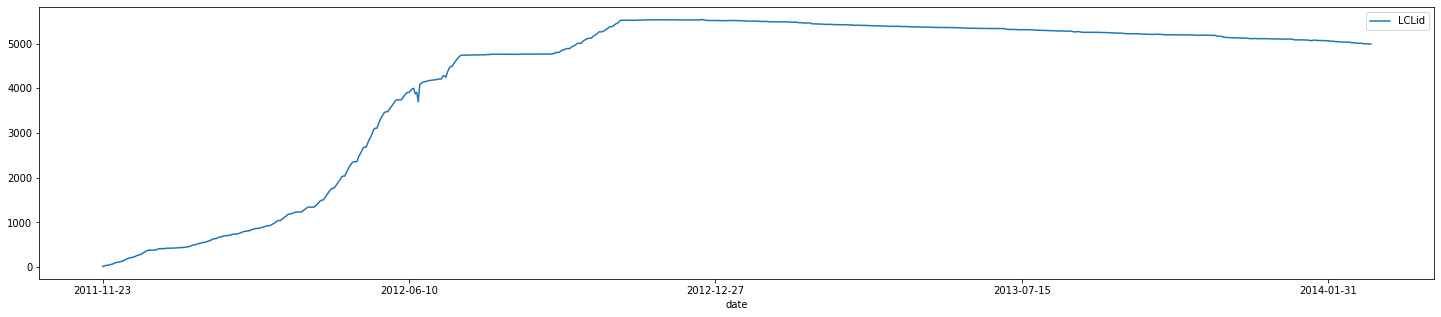

In [4]:
housecount = energy.groupby('date')[['LCLid']].nunique()
housecount.plot(figsize=(25,5))

In [6]:
weather = pd.read_csv(daily_weather_path)
weather.head(4)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [7]:
weather['icon'].value_counts()

partly-cloudy-day      619
wind                   124
fog                     91
partly-cloudy-night     33
cloudy                   9
clear-day                6
Name: icon, dtype: int64

array([[<AxesSubplot:title={'center':'temperatureMax'}>,
        <AxesSubplot:title={'center':'windBearing'}>,
        <AxesSubplot:title={'center':'dewPoint'}>,
        <AxesSubplot:title={'center':'cloudCover'}>],
       [<AxesSubplot:title={'center':'windSpeed'}>,
        <AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'apparentTemperatureHigh'}>,
        <AxesSubplot:title={'center':'visibility'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'apparentTemperatureLow'}>,
        <AxesSubplot:title={'center':'apparentTemperatureMax'}>,
        <AxesSubplot:title={'center':'uvIndex'}>],
       [<AxesSubplot:title={'center':'temperatureLow'}>,
        <AxesSubplot:title={'center':'temperatureMin'}>,
        <AxesSubplot:title={'center':'temperatureHigh'}>,
        <AxesSubplot:title={'center':'apparentTemperatureMin'}>],
       [<AxesSubplot:title={'center':'moonPhase'}>, <AxesSubplot:>,
        <AxesSubplot:>,

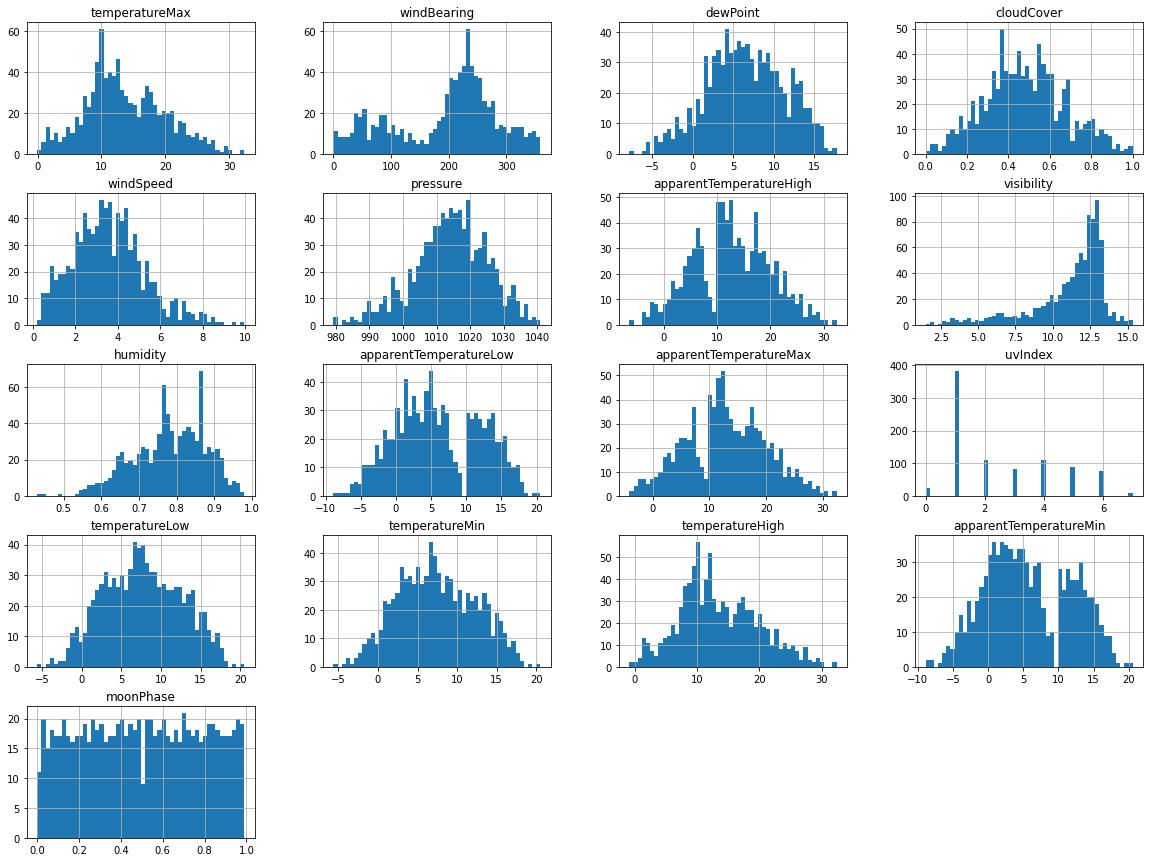

In [8]:
weather.hist(bins=50, figsize=(20,15))

In [7]:
weather['date']=  pd.to_datetime(weather['time'], format='%Y-%m-%d').dt.date # day is given as timestamp
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','date']]
weather = weather.dropna()

In [ ]:
weather_energy =  energy.merge(weather,on='date')

In [ ]:
weather_energy.to_csv("weather_energy.csv", mode='w', index=False, header=True)

In [9]:
weather_energy = pd.read_csv("weather_energy.csv")

In [12]:
weather_energy_corr = weather_energy.corr()
weather_energy_corr["energy_sum"].sort_values(ascending=False)

,energy_sum,day,month,year,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
energy_sum,1.000000,-0.003151,-0.035381,0.029554,-0.169959,-0.013566,-0.150631,0.055220,0.034569,-0.036959,...,-0.057749,0.078740,-0.159897,-0.170199,-0.145032,-0.155319,-0.162312,-0.170321,-0.166257,-0.010484
day,-0.003151,1.000000,0.000116,-0.024751,0.015844,-0.007475,0.023179,0.022433,0.067566,-0.041516,...,-0.007647,-0.015051,0.032439,0.017485,0.003946,0.038173,0.043482,0.014132,0.033662,-0.036300
month,-0.035381,0.000116,1.000000,-0.479936,0.230819,0.199020,0.337838,-0.131929,-0.117962,0.087654,...,0.070563,0.173697,0.273305,0.248333,-0.120484,0.252175,0.251207,0.229891,0.272718,0.027890
year,0.029554,-0.024751,-0.479936,1.000000,-0.204181,-0.060316,-0.242735,0.053298,0.155101,-0.138863,...,-0.038946,-0.050825,-0.230899,-0.216778,-0.221191,-0.199835,-0.209123,-0.209317,-0.237096,0.002892
temperatureMax,-0.169959,0.015844,0.230819,-0.204181,1.000000,0.080017,0.869693,-0.371125,-0.179910,0.221567,...,0.299625,-0.423865,0.903230,0.990709,0.698524,0.893569,0.904022,0.998063,0.915976,0.023786
windBearing,-0.013566,-0.007475,0.199020,-0.060316,0.080017,1.000000,0.110805,-0.088527,0.035726,-0.002817,...,0.245527,0.020226,0.064465,0.095807,-0.060521,0.058269,0.083818,0.075162,0.081983,0.038031
dewPoint,-0.150631,0.023179,0.337838,-0.242735,0.869693,0.110805,1.000000,-0.083700,-0.136712,0.073182,...,0.053531,0.030080,0.902809,0.880840,0.479486,0.898471,0.939887,0.866791,0.943295,0.007827
cloudCover,0.055220,0.022433,-0.131929,0.053298,-0.371125,-0.088527,-0.083700,1.000000,0.171537,-0.113731,...,-0.382609,0.466552,-0.192032,-0.348990,-0.275334,-0.164847,-0.116567,-0.372522,-0.151629,-0.074047
windSpeed,0.034569,0.067566,-0.117962,0.155101,-0.179910,0.035726,-0.136712,0.171537,1.000000,-0.347389,...,0.231556,-0.051356,-0.173126,-0.198477,-0.141653,-0.106764,-0.063852,-0.186937,-0.163055,-0.015849
pressure,-0.036959,-0.041516,0.087654,-0.138863,0.221567,-0.002817,0.073182,-0.113731,-0.347389,1.000000,...,0.060872,-0.293355,0.194726,0.220154,0.220720,0.160545,0.115043,0.231656,0.164523,0.066979


In [16]:
households = energy.groupby('LCLid').count()
print(households['date'].median(), households['energy_sum'].mean())
print(households.describe())

h_names_small_data_size = households[households['month'] < 600].index
s = set(h_names_small_data_size)
b = [e not in s for e in energy['LCLid']]
energy_clean = energy[b]
energy_clean = energy_clean.reset_index()
energy_clean = energy_clean[['LCLid', 'date', 'energy_sum', 'day', 'month', 'year']]

651.0 630.6868487243981
              date   energy_sum          day        month         year
count  5566.000000  5566.000000  5566.000000  5566.000000  5566.000000
mean    630.692239   630.686849   630.692239   630.692239   630.692239
std     111.945099   111.967321   111.945099   111.945099   111.945099
min       1.000000     0.000000     1.000000     1.000000     1.000000
25%     600.000000   600.000000   600.000000   600.000000   600.000000
50%     651.000000   651.000000   651.000000   651.000000   651.000000
75%     684.000000   684.000000   684.000000   684.000000   684.000000
max     829.000000   829.000000   829.000000   829.000000   829.000000


In [17]:
weather_energy_clean =  energy_clean.merge(weather,on='date')
weather_energy_clean_corr = weather_energy_clean.corr()
weather_energy_clean_corr["energy_sum"].sort_values(ascending=False)

energy_sum                 1.000000
humidity                   0.075982
cloudCover                 0.053771
windSpeed                  0.034050
year                       0.029524
day                       -0.003472
moonPhase                 -0.009925
windBearing               -0.012906
pressure                  -0.034319
month                     -0.038186
visibility                -0.056773
uvIndex                   -0.140690
dewPoint                  -0.148891
temperatureLow            -0.152948
apparentTemperatureLow    -0.157426
temperatureMin            -0.159817
apparentTemperatureMin    -0.163712
temperatureMax            -0.167044
apparentTemperatureMax    -0.167317
temperatureHigh           -0.167337
apparentTemperatureHigh   -0.167901
Name: energy_sum, dtype: float64

In [30]:
#absolute dif
sub = weather_energy_clean_corr.subtract(weather_energy_corr)
sub["energy_sum"].sort_values(ascending=False)

,energy_sum,day,month,year,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
energy_sum,0.000000,-0.000322,-0.002805,-0.000029,0.002915,0.000660,0.001741,-0.001449,-0.000518,0.002640,...,0.000976,-0.002759,0.002471,0.002882,0.004342,0.002371,0.002494,0.002984,0.002545,0.000558
day,-0.000322,0.000000,-0.002620,0.001904,0.003817,0.003628,-0.000094,-0.008803,-0.003996,0.003801,...,0.002231,-0.005558,0.000783,0.003456,0.001230,0.000612,-0.000228,0.003805,0.000056,-0.004995
month,-0.002805,-0.002620,0.000000,0.020420,-0.000093,-0.004143,-0.001584,0.003608,0.001216,0.002861,...,-0.000152,-0.005185,0.000232,-0.000377,0.001794,0.000530,0.000641,-0.000254,0.000332,0.001723
year,-0.000029,0.001904,0.020420,0.000000,-0.017465,0.003043,-0.011810,0.003159,0.001400,-0.008528,...,-0.006086,0.016894,-0.015722,-0.017597,-0.029372,-0.015746,-0.016284,-0.017679,-0.016089,-0.000543
temperatureMax,0.002915,0.003817,-0.000093,-0.017465,0.000000,-0.001860,-0.000838,-0.000677,-0.003176,-0.001444,...,-0.001777,-0.001829,-0.000604,0.000123,-0.000047,-0.000598,-0.000979,0.000028,-0.000983,-0.004923
windBearing,0.000660,0.003628,-0.004143,0.003043,-0.001860,0.000000,-0.003479,0.003489,0.001094,0.001602,...,-0.001189,-0.002825,-0.001883,-0.002230,0.000389,-0.001318,-0.002345,-0.001705,-0.002505,-0.004576
dewPoint,0.001741,-0.000094,-0.001584,-0.011810,-0.000838,-0.003479,0.000000,0.002767,-0.000315,-0.003802,...,-0.000123,-0.000540,-0.000098,-0.000964,0.006230,0.000070,0.000420,-0.000744,0.000249,-0.002161
cloudCover,-0.001449,-0.008803,0.003608,0.003159,-0.000677,0.003489,0.002767,0.000000,0.002545,-0.004665,...,0.003758,0.006449,0.001245,-0.000593,0.003894,0.000718,0.001393,-0.000562,0.001958,0.008105
windSpeed,-0.000518,-0.003996,0.001216,0.001400,-0.003176,0.001094,-0.000315,0.002545,0.000000,-0.003311,...,-0.001723,0.006477,0.000119,-0.002262,-0.000582,-0.001390,-0.001214,-0.002950,0.000649,0.001222
pressure,0.002640,0.003801,0.002861,-0.008528,-0.001444,0.001602,-0.003802,-0.004665,-0.003311,0.000000,...,-0.003547,-0.001727,-0.003755,-0.001010,-0.007036,-0.004057,-0.004813,-0.001551,-0.004910,-0.005439


In [1]:
#% dif error
sub.div(weather_energy_corr)["energy_sum"].sort_values(ascending=False)

NameError: name 'sub' is not defined

In [16]:
housecount = energy.groupby('date')[['LCLid']].nunique()
energy_avg = energy.groupby('date')[['energy_sum']].sum()
energy_avg = energy_avg.merge(housecount, on = ['date'])
energy_avg = energy_avg.reset_index()
energy_avg['avg_energy'] =  energy_avg['energy_sum']/energy_avg['LCLid']

energy_avg['day'] = [d.day for d in energy_avg['date']]
energy_avg['month'] = [d.month for d in energy_avg['date']]
energy_avg['year'] = [d.year for d in energy_avg['date']]

weather_energy_avg =  energy_avg.merge(weather,on='date')
weather_energy_avg["temp_pow_2"] = weather_energy_avg['temperatureMax']*weather_energy_avg['temperatureMax']
weather_energy_avg["day_pow_2"] = weather_energy_avg['day']*weather_energy_avg['day']
weather_energy_avg["month_pow_2"] = weather_energy_avg['month']*weather_energy_avg['month']


In [18]:
weather_energy_avg_corr = weather_energy_avg.corr()
weather_energy_avg_corr["avg_energy"].sort_values(ascending=False)

avg_energy                 1.000000
humidity                   0.358299
cloudCover                 0.239670
windSpeed                  0.148022
energy_sum                 0.094517
windBearing               -0.014108
pressure                  -0.018157
moonPhase                 -0.031500
year                      -0.041558
day                       -0.043627
month_pow_2               -0.050712
day_pow_2                 -0.052777
month                     -0.236911
visibility                -0.243771
LCLid                     -0.295172
uvIndex                   -0.727403
dewPoint                  -0.753353
temperatureLow            -0.769245
temp_pow_2                -0.777403
apparentTemperatureLow    -0.792129
temperatureMin            -0.804299
apparentTemperatureMin    -0.827818
apparentTemperatureMax    -0.840794
apparentTemperatureHigh   -0.842712
temperatureMax            -0.843227
temperatureHigh           -0.843742
Name: avg_energy, dtype: float64

array([[<AxesSubplot:xlabel='energy_sum', ylabel='energy_sum'>,
        <AxesSubplot:xlabel='avg_energy', ylabel='energy_sum'>,
        <AxesSubplot:xlabel='temperatureMax', ylabel='energy_sum'>,
        <AxesSubplot:xlabel='temp_pow_2', ylabel='energy_sum'>],
       [<AxesSubplot:xlabel='energy_sum', ylabel='avg_energy'>,
        <AxesSubplot:xlabel='avg_energy', ylabel='avg_energy'>,
        <AxesSubplot:xlabel='temperatureMax', ylabel='avg_energy'>,
        <AxesSubplot:xlabel='temp_pow_2', ylabel='avg_energy'>],
       [<AxesSubplot:xlabel='energy_sum', ylabel='temperatureMax'>,
        <AxesSubplot:xlabel='avg_energy', ylabel='temperatureMax'>,
        <AxesSubplot:xlabel='temperatureMax', ylabel='temperatureMax'>,
        <AxesSubplot:xlabel='temp_pow_2', ylabel='temperatureMax'>],
       [<AxesSubplot:xlabel='energy_sum', ylabel='temp_pow_2'>,
        <AxesSubplot:xlabel='avg_energy', ylabel='temp_pow_2'>,
        <AxesSubplot:xlabel='temperatureMax', ylabel='temp_pow_2'>,
     

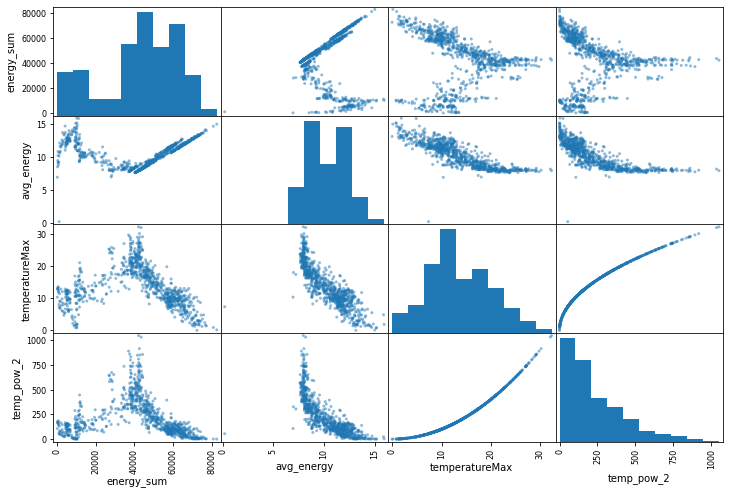

In [17]:

#attributes = ["energy_sum","avg_energy", "temperatureMax","day", "month","year","temp_pow_2"]
attributes = ["energy_sum","avg_energy", "temperatureMax","temp_pow_2"]
scatter_matrix(weather_energy_avg[attributes], figsize=(12, 8))